# Step 0: Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load and Explore data

In [2]:
#movies = pd.read_csv('./Data/movies.csv')
#ratings = pd.read_csv('./Data/ratings.csv')

movies = pd.read_csv('./Data/movies.dat',
                         delimiter='::', engine='python', header=None, encoding='latin-1',
                         names=['movieId', 'title', 'genres'])

ratings = pd.read_csv('./Data/ratings.dat',
                         delimiter='::', engine='python', header=None, encoding='latin-1',
                         names=['userId', 'movieId', 'rating', 'timestamp'])

In [3]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [5]:
len(ratings.userId.unique()), len(ratings.movieId.unique())

(6040, 3706)

In [6]:
ratings.describe()

,userId,movieId,rating,timestamp
count,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06
mean,3.024512e+03,1.865540e+03,3.581564e+00,9.722437e+08
std,1.728413e+03,1.096041e+03,1.117102e+00,1.215256e+07
min,1.000000e+00,1.000000e+00,1.000000e+00,9.567039e+08
25%,1.506000e+03,1.030000e+03,3.000000e+00,9.653026e+08
50%,3.070000e+03,1.835000e+03,4.000000e+00,9.730180e+08
75%,4.476000e+03,2.770000e+03,4.000000e+00,9.752209e+08
max,6.040000e+03,3.952000e+03,5.000000e+00,1.046455e+09


# Step 2: Drop Timestamp

In [7]:
dataset = pd.merge(movies, ratings, how='left', on='movieId')

In [8]:
dataset.tail()

,movieId,title,genres,userId,rating,timestamp
1000381,3952,"Contender, The (2000)",Drama|Thriller,5812.0,4.0,9.920721e+08
1000382,3952,"Contender, The (2000)",Drama|Thriller,5831.0,3.0,9.862231e+08
1000383,3952,"Contender, The (2000)",Drama|Thriller,5837.0,4.0,1.011903e+09
1000384,3952,"Contender, The (2000)",Drama|Thriller,5927.0,1.0,9.798525e+08
1000385,3952,"Contender, The (2000)",Drama|Thriller,5998.0,4.0,1.001781e+09


In [9]:
dataset.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1.0,5.0,978824268.0
1,1,Toy Story (1995),Animation|Children's|Comedy,6.0,4.0,978237008.0
2,1,Toy Story (1995),Animation|Children's|Comedy,8.0,4.0,978233496.0
3,1,Toy Story (1995),Animation|Children's|Comedy,9.0,5.0,978225952.0
4,1,Toy Story (1995),Animation|Children's|Comedy,10.0,5.0,978226474.0


# Step 3: List of all Genres

In [10]:
genres = []
for genre in movies.genres:
    x = genre.split('|')
    #print(x)
    for i in x:
        if(i not in genres):
            genres.append(str(i))

In [11]:
genres

['Animation',
 "Children's",
 'Comedy',
 'Adventure',
 'Fantasy',
 'Romance',
 'Drama',
 'Action',
 'Crime',
 'Thriller',
 'Horror',
 'Sci-Fi',
 'Documentary',
 'War',
 'Musical',
 'Mystery',
 'Film-Noir',
 'Western']

# Step 4: List of all Movie titles

In [12]:
movies.title.describe()

count                 3883
unique                3883
top       Toy Story (1995)
freq                     1
Name: title, dtype: object

In [13]:
titles = []
for title in movies.title:
    if(title not in titles):
        titles.append(str(title))

In [14]:
titles

['Toy Story (1995)',
 'Jumanji (1995)',
 'Grumpier Old Men (1995)',
 'Waiting to Exhale (1995)',
 'Father of the Bride Part II (1995)',
 'Heat (1995)',
 'Sabrina (1995)',
 'Tom and Huck (1995)',
 'Sudden Death (1995)',
 'GoldenEye (1995)',
 'American President, The (1995)',
 'Dracula: Dead and Loving It (1995)',
 'Balto (1995)',
 'Nixon (1995)',
 'Cutthroat Island (1995)',
 'Casino (1995)',
 'Sense and Sensibility (1995)',
 'Four Rooms (1995)',
 'Ace Ventura: When Nature Calls (1995)',
 'Money Train (1995)',
 'Get Shorty (1995)',
 'Copycat (1995)',
 'Assassins (1995)',
 'Powder (1995)',
 'Leaving Las Vegas (1995)',
 'Othello (1995)',
 'Now and Then (1995)',
 'Persuasion (1995)',
 'City of Lost Children, The (1995)',
 'Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)',
 'Dangerous Minds (1995)',
 'Twelve Monkeys (1995)',
 'Wings of Courage (1995)',
 'Babe (1995)',
 'Carrington (1995)',
 'Dead Man Walking (1995)',
 'Across the Sea of Time (1995)',
 'It Takes Two (1995)',
 'Clueless (

# Step 5: Classifying different ratings

<AxesSubplot:>

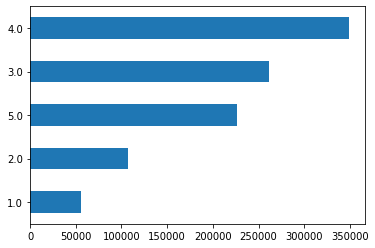

In [15]:
dataset.rating.value_counts().sort_values().plot(kind='barh')

# Step 6: Dimensionality Reduction
To reduce the dimensionality of the dataset, we will filter out rarely rated movies and rarely rating users

## 6.1 Filter movies with less than 3 ratings

In [16]:
filter_movies = ratings['movieId'].value_counts() > 3
filter_movies = filter_movies[filter_movies].index.tolist()
len(filter_movies)

3461

## 6.2 Filter users with less than 3 movies rated

In [17]:
filter_users = ratings['userId'].value_counts() > 3
filter_users = filter_users[filter_users].index.tolist()
len(filter_users)

6040

## 6.3 Remove rarely rated movies and rarely rating users

In [18]:
ratings = ratings[(ratings['movieId'].isin(filter_movies)) & (ratings['userId'].isin(filter_users))]
print(f'New shape: {ratings.shape}')

New shape: (999791, 4)


# Step 7: Create User Item Matrix

In [19]:
table = dataset.pivot_table(index='title', columns='userId', values='rating')

In [20]:
table.shape

(3706, 6040)

In [21]:
table.tail()

userId,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,6031.0,6032.0,6033.0,6034.0,6035.0,6036.0,6037.0,6038.0,6039.0,6040.0
title,,,,,,,,,,,,,,,,,,,,,
"Zed & Two Noughts, A (1985)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zero Effect (1998),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zero Kelvin (Kjærlighetens kjøtere) (1995),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zeus and Roxanne (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
eXistenZ (1999),NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN


In [22]:
table.head(10)

userId,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,6031.0,6032.0,6033.0,6034.0,6035.0,6036.0,6037.0,6038.0,6039.0,6040.0
title,,,,,,,,,,,,,,,,,,,,,
"$1,000,000 Duck (1971)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Night Mother (1986),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
'Til There Was You (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"'burbs, The (1989)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...And Justice for All (1979),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1-900 (1994),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10 Things I Hate About You (1999),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
101 Dalmatians (1961),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN
101 Dalmatians (1996),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


## Step 8: Collaborative filtering with KNN (K- nearest neighbor)

In [23]:
from scipy.sparse import csr_matrix
from  sklearn.neighbors import NearestNeighbors

In [24]:
table

userId,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,6031.0,6032.0,6033.0,6034.0,6035.0,6036.0,6037.0,6038.0,6039.0,6040.0
title,,,,,,,,,,,,,,,,,,,,,
"$1,000,000 Duck (1971)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Night Mother (1986),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
'Til There Was You (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"'burbs, The (1989)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...And Justice for All (1979),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Zed & Two Noughts, A (1985)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zero Effect (1998),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zero Kelvin (Kjærlighetens kjøtere) (1995),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
table = table.fillna(0)

In [26]:
table

userId,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,6031.0,6032.0,6033.0,6034.0,6035.0,6036.0,6037.0,6038.0,6039.0,6040.0
title,,,,,,,,,,,,,,,,,,,,,
"$1,000,000 Duck (1971)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Night Mother (1986),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0
'Til There Was You (1997),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"'burbs, The (1989)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...And Justice for All (1979),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Zed & Two Noughts, A (1985)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zero Effect (1998),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zero Kelvin (Kjærlighetens kjøtere) (1995),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
table.values

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [28]:
matrix = csr_matrix(table.values)

# Step 9: Generating recommendation using KNN for the selected movie

In [29]:
model_knn = NearestNeighbors(metric= 'cosine', algorithm= 'brute')
model_knn.fit(matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [30]:
user_query_index = np.random.choice(table.shape[1])

#### We are randomly choosing a a movie to generate recommendation for using KNN

In [31]:
table.index[user_query_index]

'Milk Money (1994)'

In [32]:
table.iloc[user_query_index, :]

userId
1.0       0.0
2.0       0.0
3.0       0.0
4.0       0.0
5.0       0.0
         ... 
6036.0    0.0
6037.0    0.0
6038.0    0.0
6039.0    0.0
6040.0    0.0
Name: Milk Money (1994), Length: 6040, dtype: float64

In [33]:
distances, indices = model_knn.kneighbors(table.iloc[user_query_index, :].values.reshape(1, -1), n_neighbors = 6)

In [34]:
for i in range(0, len(distances.flatten())):
    # the below line will be printed anyway
    # we always start i = 0
    # just getting the variable i ready to print for which book we are
    # generating the recommendation for:
    if i == 0:
        print('Recommendation for {0}:\n'.format(table.index[user_query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, table.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendation for Milk Money (1994):

1: Pretty Woman (1990), with distance of 0.6487444062266766:
2: You've Got Mail (1998), with distance of 0.6497751132955034:
3: Home Alone 2: Lost in New York (1992), with distance of 0.6499361516894293:
4: My Best Friend's Wedding (1997), with distance of 0.6515428965027039:
5: Picture Perfect (1997), with distance of 0.6522816269692062:


# Step 10: Generating recommendation using Linear Kernel Distance for the selected movie

In [35]:
from sklearn.metrics.pairwise import linear_kernel

In [36]:
cosine = linear_kernel(matrix, matrix)
cosine

array([[ 382.,   42.,   15., ...,    0.,   31.,   37.],
       [  42.,  882.,   71., ...,    0.,    0.,  162.],
       [  15.,   71.,  430., ...,    0.,   13.,   92.],
       ...,
       [   0.,    0.,    0., ...,   25.,    0.,   16.],
       [  31.,    0.,   13., ...,    0.,  174.,   41.],
       [  37.,  162.,   92., ...,   16.,   41., 4915.]])

In [37]:
def recommendations(title):
    idx = user_query_index
    print('Recommendation for {0}:\n'.format(table.index[user_query_index]))
    scores = list(enumerate(cosine[idx]))
    scores = sorted(scores, key=lambda x: x[1], reverse=True)
    scores = scores[1:7]
    movie_indices = [i[0] for i in scores]
    
    for i in range(0, len(scores)):

        if i == 0:
            print('')
        else:
            #print('{0}: {1}, with distance of {2}:'.format(i, table.index[indices.flatten()[i]], distances.flatten()[i]))
            print('{0}: {1}, with sim score of {2}:'.format(i, table.index[movie_indices[i]], scores[i][1]))
            
    return table.iloc[movie_indices]

In [38]:
movie_rec = recommendations(table.index[user_query_index])

Recommendation for Milk Money (1994):


1: Star Wars: Episode V - The Empire Strikes Back (1980), with sim score of 1924.0:
2: Men in Black (1997), with sim score of 1905.0:
3: Star Wars: Episode IV - A New Hope (1977), with sim score of 1899.0:
4: Milk Money (1994), with sim score of 1874.0:
5: Back to the Future (1985), with sim score of 1873.0:
